In [13]:
%matplotlib inline
import keras
    
from keras.layers import SimpleRNN

keras.__version__

'2.2.4'

In [12]:
import numpy as np

timesteps = 100 
input_features = 32 
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features)) 
b = np.random.random((output_features,))

successive_outputs = []
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    successive_outputs.append(output_t)
    state_t = output_t

final_output_sequence = np.stack(successive_outputs, axis=0)   

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [15]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [16]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # number of words to consider as features
maxlen = 500  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [17]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.6435 - acc: 0.6123 - val_loss: 0.5041 - val_acc: 0.7702
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.4047 - acc: 0.8252 - val_loss: 1.0310 - val_acc: 0.6002
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2913 - acc: 0.8844 - val_loss: 0.4392 - val_acc: 0.8004
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2269 - acc: 0.9140 - val_loss: 0.3867 - val_acc: 0.8474
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1484 - acc: 0.9470 - val_loss: 0.4371 - val_acc: 0.8542
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.0956 - acc: 0.9673 - val_loss: 0.4387 - val_acc: 0.8374
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0572 - acc: 0.9823 - val_loss: 0.4804 - val_acc:

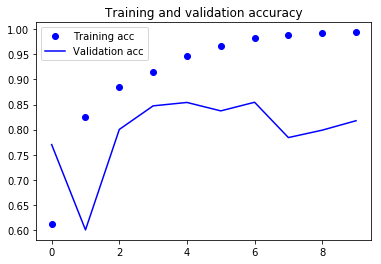

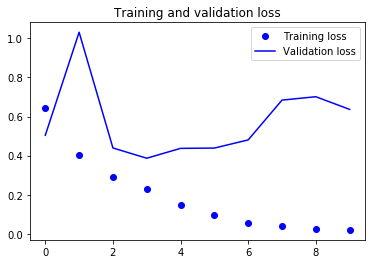

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 84s 4ms/step - loss: 0.5113 - acc: 0.7618 - val_loss: 0.3916 - val_acc: 0.8418
Epoch 2/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.2888 - acc: 0.8860 - val_loss: 0.3847 - val_acc: 0.8644
Epoch 3/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.2314 - acc: 0.9117 - val_loss: 0.4396 - val_acc: 0.8504
Epoch 4/10
20000/20000 [==============================] - 80s 4ms/step - loss: 0.1947 - acc: 0.9274 - val_loss: 0.4468 - val_acc: 0.8672
Epoch 5/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1757 - acc: 0.9368 - val_loss: 0.2973 - val_acc: 0.8836
Epoch 6/10
20000/20000 [==============================] - 82s 4ms/step - loss: 0.1534 - acc: 0.9452 - val_loss: 0.4396 - val_acc: 0.8380
Epoch 7/10
20000/20000 [==============================] - 81s 4ms/step - loss: 0.1430 - acc: 0.9487 - val_loss: 0.3031 - val_acc:

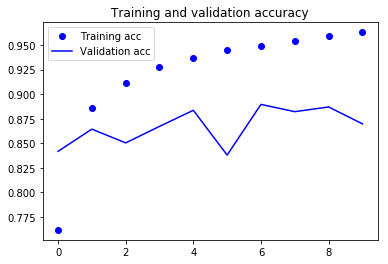

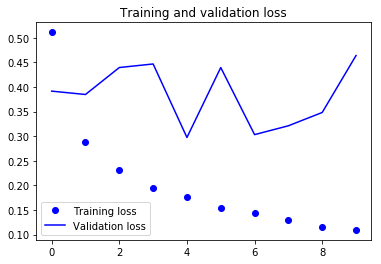

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()